### 와인 품질 데이터로 클러스터링을 활용한 품질 분류

Kaggle의 "**Red Wine Quality** Dataset"을 사용

문제

- **데이터 준비 및 전처리**
    - "**Red** Wine Quality Dataset"을 로드하고, 주요 특성(와인의 화학적 특성)을 선택하세요.
    - 데이터를 정규화하여 클러스터링을 위한 준비를 하세요.
    - 주요 열은 와인의 화학적 특성('fixed acidity', 'volatile acidity' 등)과 품질 점수(quality)
    - 
- **K-Means 클러스터링 적용**
    - 클러스터 수를 3으로 설정하고 K-Means 알고리즘을 사용해 클러스터링을 수행하세요.
    - 각 데이터 포인트의 클러스터 레이블을 데이터프레임에 추가하세요.
    - 
- **클러스터 품질 해석**
    - 각 클러스터의 특성을 분석하고 평균값을 비교하여 클러스터별 차이를 해석하세요.
    - 각 클러스터가 특정 와인 품질(quality) 점수와 관련이 있는지 탐색하세요.
    - 
- **결과 시각화**
    - PCA를 사용해 데이터를 2차원으로 축소하고 클러스터링 결과를 시각화하세요.

클러스터 별 평균 값 : 
        fixed acidity  volatile acidity  citric acid  residual sugar  \
label                                                                 
0          10.007198          0.405311     0.464728        2.611965   
1           8.108086          0.526482     0.291968        3.049730   
2           7.214706          0.616709     0.120588        2.220658   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
label                                                                   
0       0.099800            11.171206             31.447471  0.997559   
1       0.086911            27.888140             89.881402  0.997138   
2       0.078877            13.018908             34.722689  0.995959   

             pH  sulphates   quality  
label                                 
0      3.196498   0.751848  6.056420  
1      3.293073   0.633585  5.326146  
2      3.402997   0.603459  5.494398  


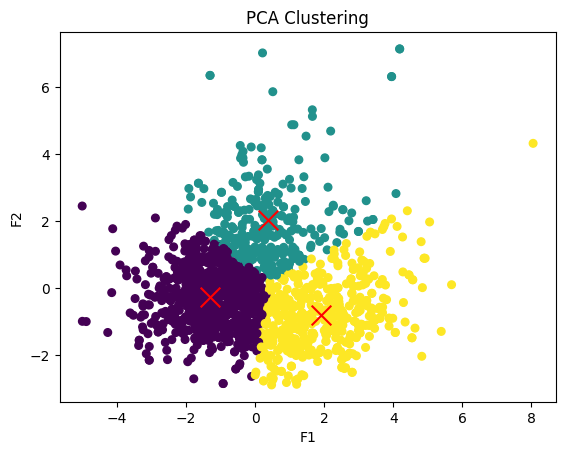

In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 데이터 로드 후 화학적 특성이 아닌 'alcohol' 제거
df = pd.read_csv('winequality-red.csv')
df = df.drop(columns=['alcohol'])

# 데이터 정규화
scaler = StandardScaler()
scaler_df = scaler.fit_transform(df)

# 군집화 진행
kmeans = KMeans(n_clusters=3)
# 데이터 프레임 label 값 column으으로 추가
df['label'] = kmeans.fit_predict(scaler_df)

print('클러스터 별 평균 값 : \n',df.groupby('label').mean())

#PCA 진행 : 2차원으로 축소
pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaler_df)

k = 3
# Kmeans 객체생성 학습
kmeans = KMeans(n_clusters=k, random_state=42)
# 레이블 값 반환
cluster_labels = kmeans.fit_predict(pca_df)

# 군집 결과 시각화
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('PCA Clustering')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()


In [74]:
print('클러스터 별 평균 값 : \n',df.groupby('label').mean())

클러스터 별 평균 값 : 
        fixed acidity  volatile acidity  citric acid  residual sugar  \
label                                                                 
0           7.216645          0.612061     0.124072        2.218886   
1           9.988032          0.392627     0.460974        2.570892   
2           8.439385          0.530462     0.335785        3.258923   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
label                                                                   
0       0.079438            14.264405             38.718310  0.995979   
1       0.086132            10.551724             28.669371  0.997440   
2       0.108785            27.820000             92.089231  0.997539   

             pH  sulphates   quality  
label                                 
0      3.399949   0.604725  5.491677  
1      3.209331   0.718012  6.085193  
2      3.252031   0.695723  5.301538  


In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 데이터 로드 후 화학적 특성이 아닌 'alcohol' 제거
df = pd.read_csv('winequality-red.csv')
df = df.drop(columns=['alcohol'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,5


In [64]:
# 데이터 정규화규화
scaler = StandardScaler()
scaler_df = scaler.fit_transform(df)

In [65]:
# 군집화 진행
kmeans = KMeans(n_clusters=3)
# 데이터 프레임 label 값 column으으로 추가
label = kmeans.fit_predict(scaler_df)
df['label'] = label
for i in range(3):
    print(f'{i}번째 레이블 : \n', df[df['label'] == i].mean())

0번째 레이블 : 
 fixed acidity             8.144231
volatile acidity          0.520096
citric acid               0.349231
residual sugar            8.048077
chlorides                 0.098981
free sulfur dioxide      32.826923
total sulfur dioxide    105.576923
density                   0.998677
pH                        3.273462
sulphates                 0.710000
quality                   5.403846
label                     0.000000
dtype: float64
1번째 레이블 : 
 fixed acidity            9.836013
volatile acidity         0.407035
citric acid              0.455176
residual sugar           2.477387
chlorides                0.098444
free sulfur dioxide     13.294807
total sulfur dioxide    37.165829
density                  0.997495
pH                       3.209347
sulphates                0.748124
quality                  5.974874
label                    1.000000
dtype: float64
2번째 레이블 : 
 fixed acidity            7.376316
volatile acidity         0.604147
citric acid              0.150937
resi

In [76]:
print(kmeans.cluster_centers_)

[[-1.30980531 -0.25896931]
 [ 0.374081    2.02438094]
 [ 1.90474646 -0.78109485]]


In [67]:
print(df.groupby('label')['quality'].mean())

label
0    5.403846
1    5.974874
2    5.435789
Name: quality, dtype: float64


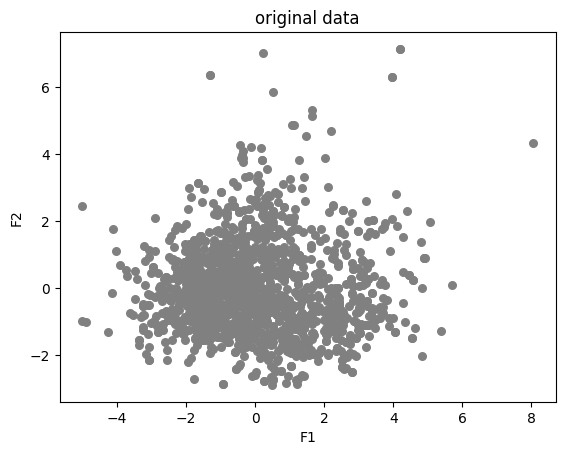

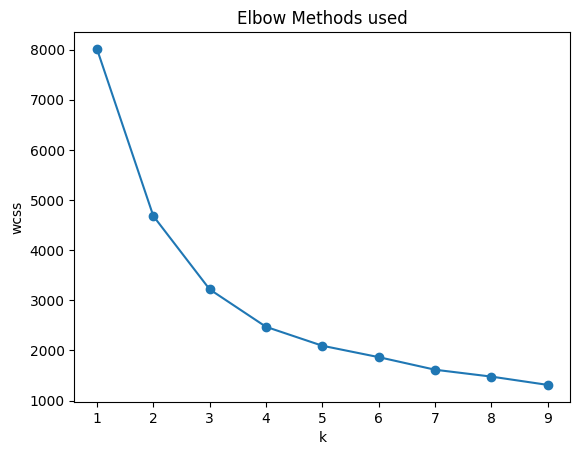

0.4089608678556123


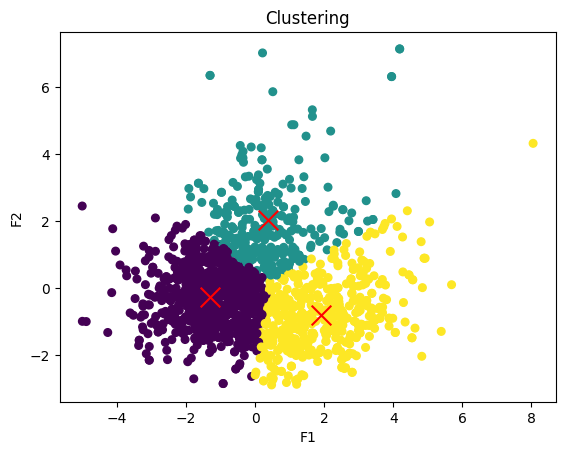

In [68]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaler_df)
# 데이터 그래프 생성 : 군집화 하기 전, 중앙값 구하기 전
plt.scatter(pca_df[:, 0], pca_df[:, 1], s=30, c='gray', label='original data')
plt.title('original data')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

# k의 최적값을 찾기 위한 엘보우 메서드
wcss = []
k_range = range(1, 10)
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit_predict(pca_df)
    wcss.append(kmeans_temp.inertia_)

plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Methods used')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

k = 3
# Kmeans 객체생성 학습
kmeans = KMeans(n_clusters=k, random_state=42)
# 레이블 값 반환
cluster_labels = kmeans.fit_predict(pca_df)

# 실루엣 스코어
sil_avg = silhouette_score(pca_df, cluster_labels)
print(sil_avg)

# 시각화를 위한 점수계산
sil_values = silhouette_samples(pca_df, cluster_labels)

# 군집 결과 시각화
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('Clustering')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()